# Results

This Notebook visualizes the results gathered from the tests.

#### Loading data

In [1]:
from plot_utils import plot_generalization_ability, plot_accuracy_comparison, plot_accuracies_per_selector, plot_accuracies_per_percentage

## Visualization

### Generalization ability

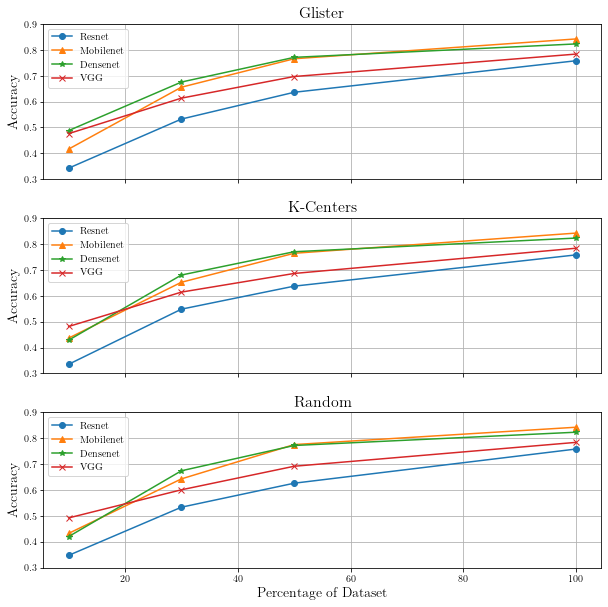

In [2]:
plot_generalization_ability()

### Accuracy comparison for selection methods over dataset percentage    

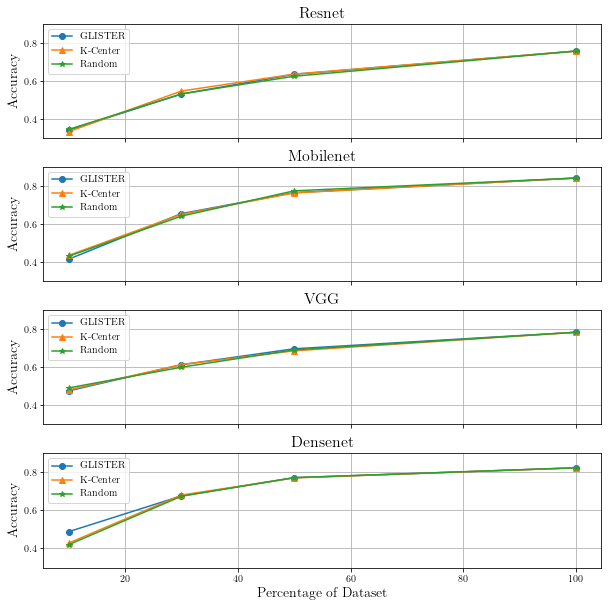

In [3]:
plot_accuracy_comparison()

### Accuracies over epochs for different nets: GLISTER

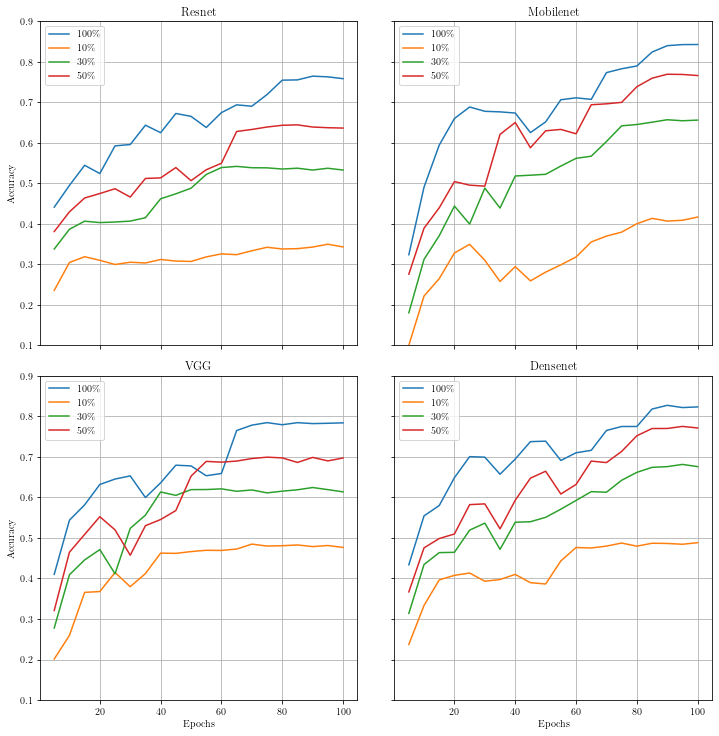

In [3]:
plot_accuracies_per_selector('Glister')

### Accuracies over epochs for different nets: K-Centers

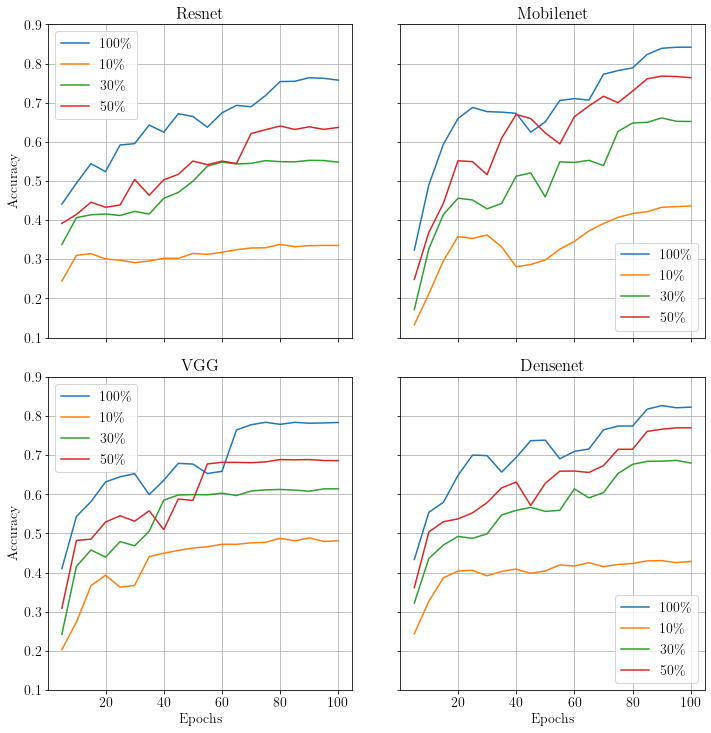

In [63]:
plot_accuracies_per_selector('K-Centers')

### Accuracies over epochs for different nets: Random

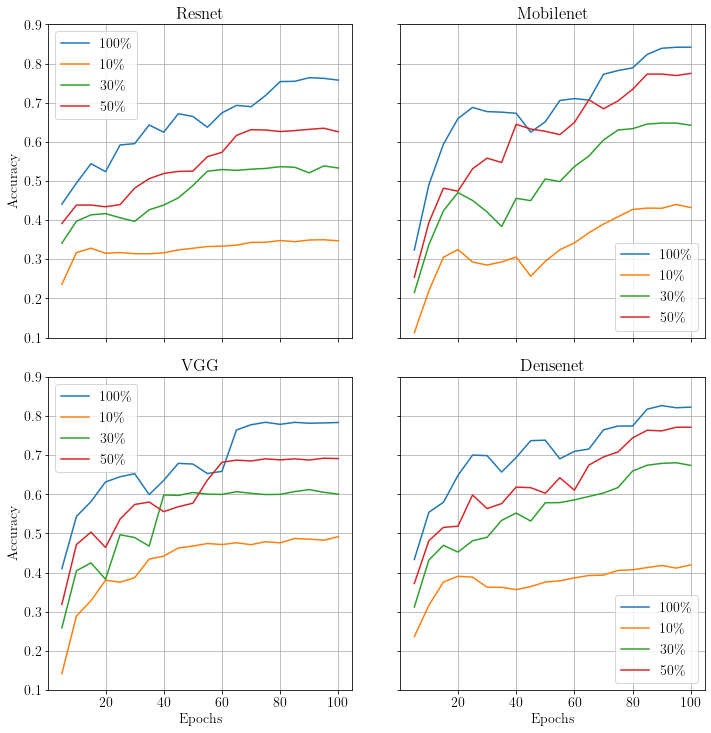

In [64]:
plot_accuracies_per_selector('Random')

### Accuracies over epochs for different nets: 10%

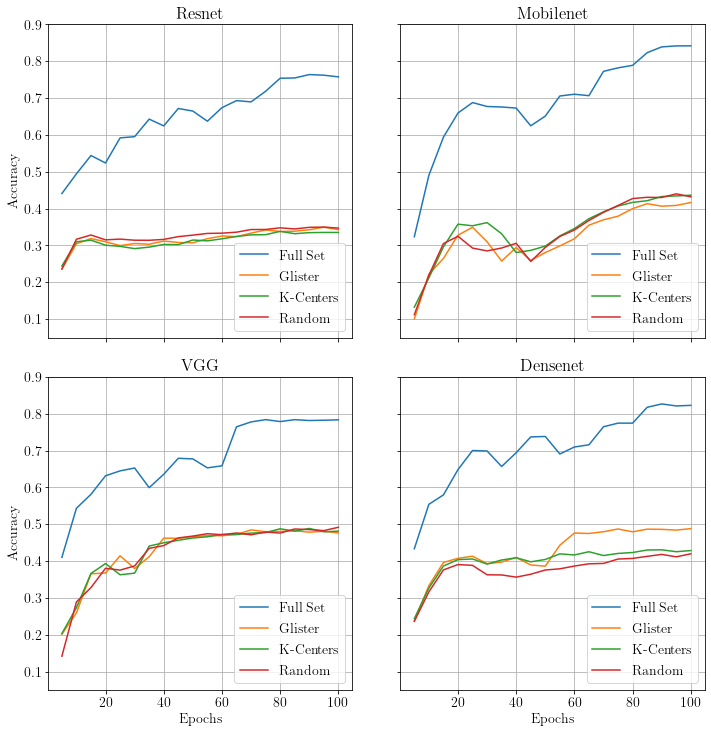

In [65]:
plot_accuracies_per_percentage(10)

### Accuracies over epochs for different nets: 30%

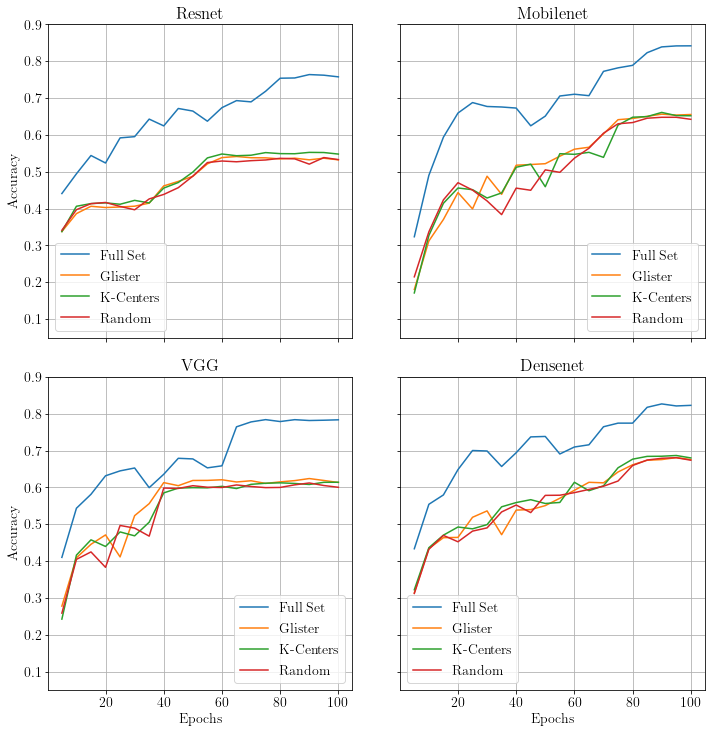

In [66]:
plot_accuracies_per_percentage(30)

### Accuracies over epochs for different nets: 50%

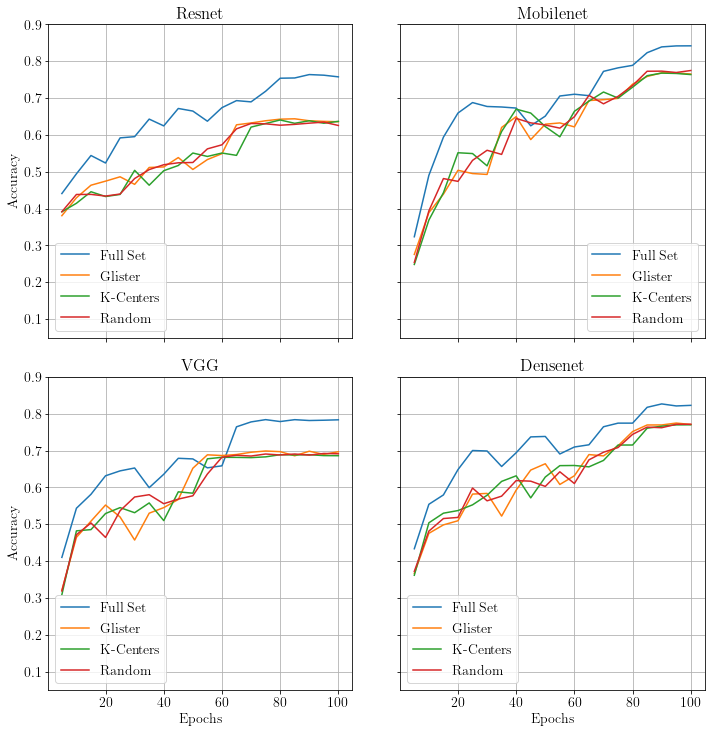

In [67]:
plot_accuracies_per_percentage(50)